<div style="text-align: center;">
    <div style="font-size: 28px;"><strong>Stock Market Analysis </strong></div>
    <div style="font-size: 15px;">Author: Daniel A, Daniel B, David</div>
</div>

<div style="text-align: center;">
    <img src="Bullimage.jpg">
</div>


**<span style="font-size: 1.6em">Table of Contents</span>** 

1. [Introduction](#introduction)
2. [Overview](#overview)

4. [Data Curation](#data-curation)
   - [Datasets](#datasets)
   - [Why We Are Choosing These Datasets](#why-we-are-choosing-these-datasets)

5. [Exploratory Data Analysis](#exploratory-data-analysis)
   - [Data Preprocessing](#data-preprocessing)
   - [Importing and Parsing Data](#importing-and-parsing-data)
   - [Organizing Data](#organizing-data)
   - [Basic Data Exploration and Summary Statistics](#basic-data-exploration-and-summary-statistics)
   - [Main Characteristics](#main-characteristics)
   - [Identifying Key Attributes](#identifying-key-attributes)

6. [Hypothesis Testing and Statistical Analysis](#hypothesis-testing-and-statistical-analysis)
   - [T Test](#t-test)
   - [Mann-Whitney U Test](#mann-whitney-u-test)
   - [ANOVA](#anova)
   - [Presenting Conclusions and Visualizations](#presenting-conclusions-and-visualizations)
     - [Conclusion 1: Correlation Analysis](#conclusion-1-correlation-analysis)
     - [Conclusion 2: Outlier Detection](#conclusion-2-outlier-detection)
     - [Conclusion 3: Hypothesis Testing](#conclusion-3-hypothesis-testing)

7. [Predictive Modeling](#predictive-modeling)
   - [Model Selection](#model-selection)
   - [Model Implementation](#model-implementation)
   - [Model Evaluation](#model-evaluation)

8. [Visualization](#visualization)
   - [Explanation of Results](#explanation-of-results)
   - [Plots and Graphs](#plots-and-graphs)

9. [Insights and Conclusions](#insights-and-conclusions)
   - [Summary of Findings](#summary-of-findings)
   - [Implications and Recommendations](#implications-and-recommendations)



<div style="text-align: center;">
    <span style="font-size: 1.6em; font-weight: bold">Data Collection</span>
</div>

The stock market is a dynamic and complex system that plays a crucial role in the global economy. Understanding stock market trends and predicting future stock prices are essential for investors, policymakers, and financial analysts. This project aims to analyze historical stock market data, identify significant trends, and develop predictive models to forecast future stock prices.

By examining data from key sectors, including major financial services and banks, and focusing on the S&P 500 index, we aim to gain a deeper understanding of how different factors influence stock prices. Our analysis will cover periods of economic stability as well as major financial events, such as the 2008 financial crisis and the COVID-19 pandemic. This focused analysis will help us uncover patterns, correlations, and anomalies that can inform investment strategies and economic policies.

The main objectives of this project are:

    Behavioral Analysis: Track and analyze stock price behavior over time to identify trends and patterns.
    Event Impact Analysis: Examine the effects of significant events on stock prices, including financial crises, political changes, and economic policies.
    Predictive Modeling: Develop models to predict future stock prices using historical data and advanced machine learning techniques.

Data Curation
S&P 500 Index (2006-2020):

    Source: Kaggle
    URL: https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs
    Description: Provides comprehensive data on the S&P 500 index from 2006 to 2020, including daily high, low, open, close, and adjusted close prices, along with trading volumes.


Why We Are Choosing These Datasets

    Historical Coverage: These datasets provide extensive historical data from 2006 to 2020, covering key periods such as the 2008 financial crisis and the COVID-19 pandemic.
    Focused Analysis: By concentrating on the S&P 500 index and major financial services and banks, we can perform a detailed and targeted analysis.
    Event Impact Analysis: These datasets allow us to examine the effects of significant events (e.g., financial crises, political changes) on stock prices, offering valuable insights into market behavior.

**<span style="font-size: 1.6em">Data Manipulation and Analysis</span>**

- **pandas**: For data manipulation and analysis.
- **numpy**: For numerical operations.

**<span style="font-size: 1.6em">Data Visualization</span>**

- **matplotlib**: For creating static, interactive, and animated visualizations.
- **seaborn**: For statistical data visualization, built on top of matplotlib.
- **plotly**: For interactive visualizations.

**<span style="font-size: 1.6em">Statistical Analysis</span>**

- **scipy**: For statistical tests and scientific computing.
- **statsmodels**: For statistical modeling and hypothesis testing.

**<span style="font-size: 1.6em">Machine Learning</span>**

- **scikit-learn**: For machine learning algorithms and tools.

**<span style="font-size: 1.6em">Additional Libraries</span>**

- **yfinance**: For fetching historical market data from Yahoo Finance
- **requests**: For making HTTP requests to download data
- **datetime**: For manipulating dates and times


In [33]:
#Data Manipulation and Analysis
import pandas as pd
import numpy as np
import os

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistical Analysis
import scipy.stats as stats
import statsmodels.api as sm

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Additional Libraries
import yfinance as yf
import requests
from datetime import datetime


**<span style="font-size: 1.6em">Exploratory Data Analysis</span>**

**Data Preprocessing**

Data preprocessing is a crucial step in any data analysis project. It involves transforming raw data into a format that is suitable for analysis. This includes importing data, parsing and converting data types, handling missing values, and organizing the data into a structured format such as a pandas DataFrame.

**Importing and Parsing Data**

The first step in data preprocessing is to import the dataset into your Python environment and parse any necessary columns. This involves loading the data from a CSV file.


**Loading the Dat**

    Read the data from the CSV file.
    Assign appropriate column names.
    Convert the 'Date' column to datetime format.
    Ensure the other columns are in the correct data types (float64 for numerical values and int64 for Volume).

In [45]:
# Column names for the dataset
column_names = ["Date", "High", "Low", "Open", "Close", "Volume", "Adj Close"]


sp500_data = pd.read_csv('/Users/danielberhane/Desktop/CMSC320/CMSC320 Final_Project/CMSC320-Final_Group_project/Stock Market Indices (2006-2020)/SPX.csv', names=column_names, header=None, skiprows=1)

# Convert 'Date' column to datet ime
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

# Convert other columns to app ropriate data types
sp500_data[['High', 'Low', 'Open', 'Close', 'Adj Close']] = sp500_data[['High', 'Low', 'Open', 'Close', 'Adj Close']].astype(float)
sp500_data['Volume'] = sp500_data['Volume'].astype(int)

# Verify
print("Data loaded successfully.")
print(sp500_data.dtypes)
print(sp500_data.head())


Data loaded successfully.
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object
        Date         High          Low         Open        Close      Volume  \
0 2006-01-03  1270.219971  1245.739990  1248.290039  1268.800049  2554570000   
1 2006-01-04  1275.369995  1267.739990  1268.800049  1273.459961  2515330000   
2 2006-01-05  1276.910034  1270.300049  1273.459961  1273.479980  2433340000   
3 2006-01-06  1286.089966  1273.479980  1273.479980  1285.449951  2446560000   
4 2006-01-09  1290.780029  1284.819946  1285.449951  1290.150024  2301490000   

     Adj Close  
0  1268.800049  
1  1273.459961  
2  1273.479980  
3  1285.449951  
4  1290.150024  


**Statistical Analysis:**

    Calculate summary statistics for each column.
    Check for any missing values

In [ ]:
# Statistical analysis
print("**Statistical Analysis**")
print(sp500_data.describe())

# Check  missing values
print("Missing values in each column:")
print(sp500_data.isnull().sum())

**Visualizations:**

    Plot the close price over time.
     Plot the moving averages (50-day and 200-day) over time.
    Plot the daily returns.
     Plot the histogram of daily returns.
    Plot the cumulative return.
     Plot the correlation matrix.

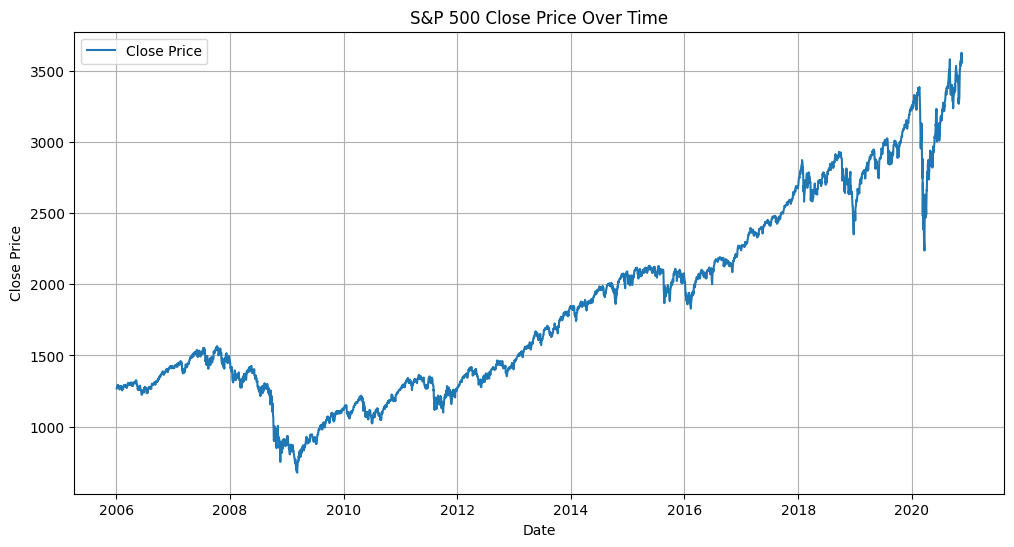

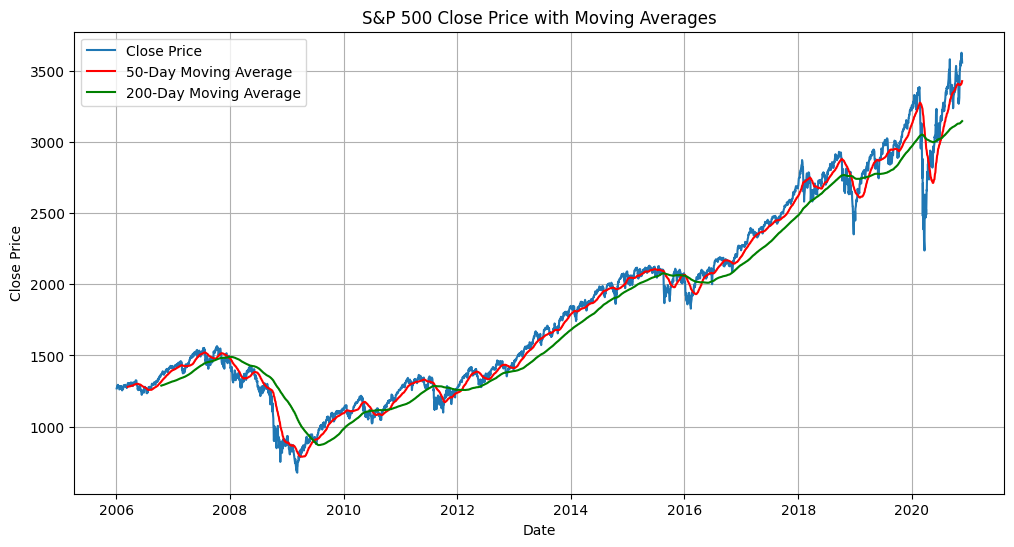

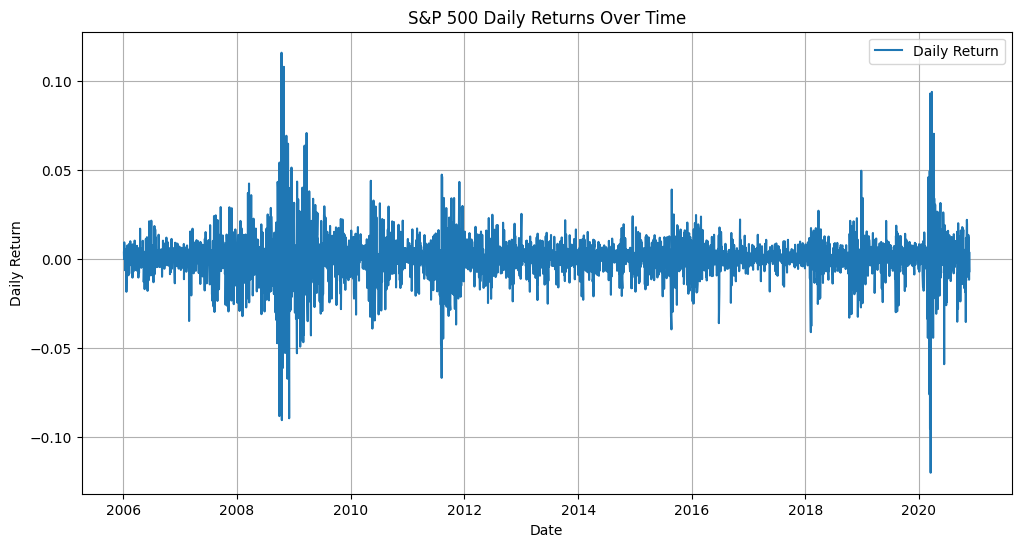

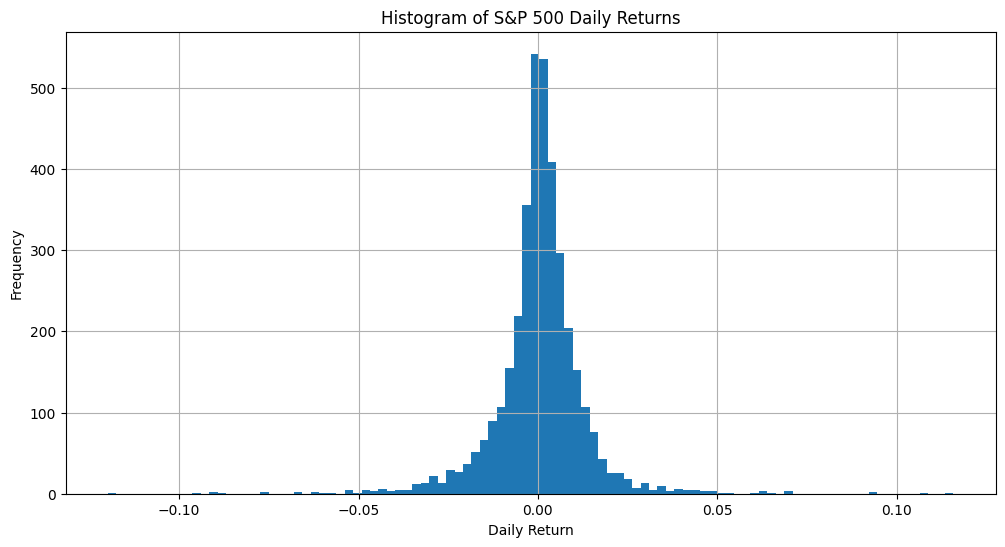

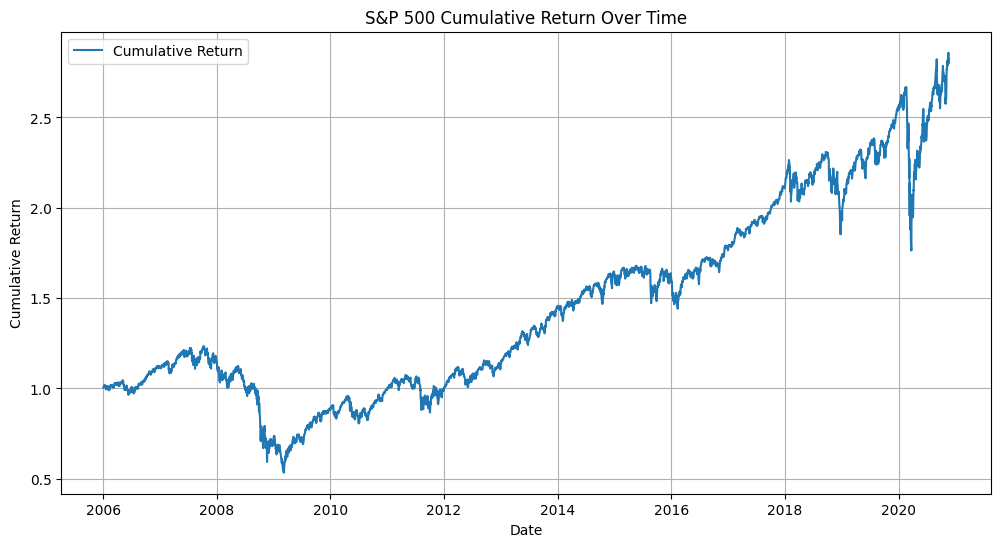

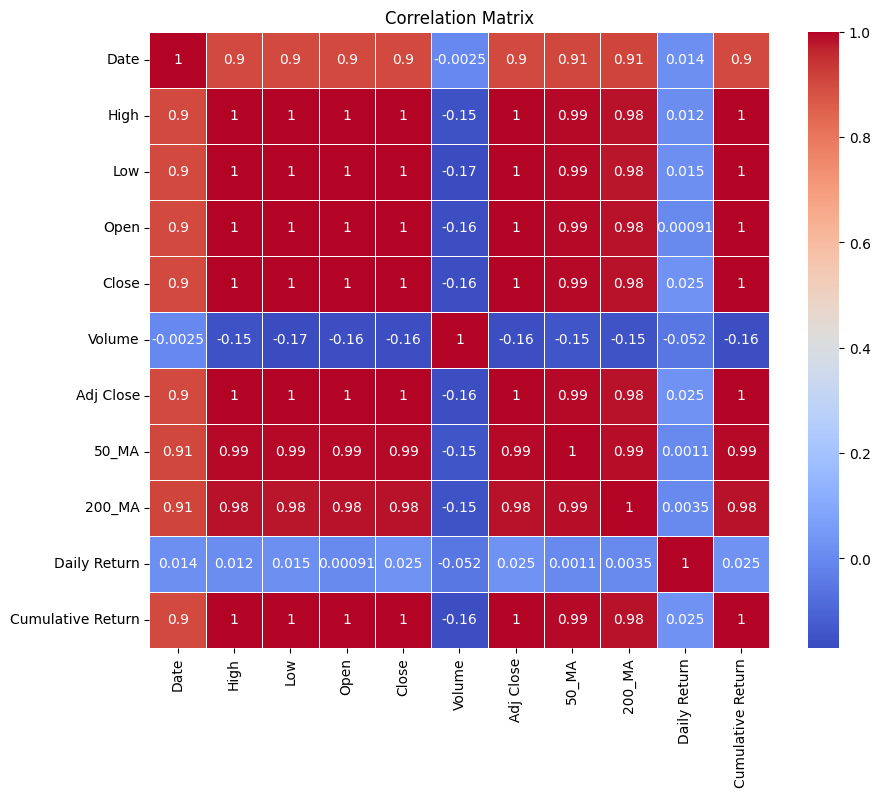

In [46]:
# Plotting t price over time
plt.figure(figsize=(12, 6))
plt.plot(sp500_data['Date'], sp500_data['Close'], label='Close Price')
plt.title('S&P 500 Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Moving Averages
sp500_data['50_MA'] = sp500_data['Close'].rolling(window=50).mean()
sp500_data['200_MA'] = sp500_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(sp500_data['Date'], sp500_data['Close'], label='Close Price')
plt.plot(sp500_data['Date'], sp500_data['50_MA'], label='50-Day Moving Average', color='red')
plt.plot(sp500_data['Date'], sp500_data['200_MA'], label='200-Day Moving Average', color='green')
plt.title('S&P 500 Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Daily returns
sp500_data['Daily Return'] = sp500_data['Close'].pct_change()

plt.figure(figsize=(12, 6))
plt.plot(sp500_data['Date'], sp500_data['Daily Return'], label='Daily Return')
plt.title('S&P 500 Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

# Histogram of daily returns
plt.figure(figsize=(12, 6))
sp500_data['Daily Return'].hist(bins=100)
plt.title('Histogram of S&P 500 Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Cumulative return
sp500_data['Cumulative Return'] = (1 + sp500_data['Daily Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(sp500_data['Date'], sp500_data['Cumulative Return'], label='Cumulative Return')
plt.title('S&P 500 Cumulative Return Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = sp500_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Explanation of Each Plot Related to the S&P 500 Data

## 1. S&P 500 Close Price Over Time

**Description:**  
This plot shows the daily closing prices of the S&P 500 index from 2006 to 2020.

**Key Insights:**

1. **Trend Identification:**  
   The plot displays a general upward trend in the S&P 500 index over the period, indicating overall market growth.

2. **Major Events:**  
   Significant drops can be observed during the 2008 financial crisis and the COVID-19 pandemic in 2020, reflecting their impact on the stock market.

3. **Volatility:**  
   The plot also highlights periods of higher volatility, where price fluctuations are more pronounced.

## 2. S&P 500 Close Price with Moving Averages

**Description:**  
This plot shows the daily closing prices of the S&P 500 index along with the 50-day and 200-day moving averages.

**Key Insights:**

1. **Short-term vs. Long-term Trends:**  
   The 50-day moving average (red line) provides a view of short-term trends, while the 200-day moving average (green line) shows long-term trends.

2. **Trend Reversal:**  
   When the 50-day moving average crosses above the 200-day moving average, it often signals a bullish trend (buy signal). Conversely, crossing below can indicate a bearish trend (sell signal).

3. **Smoothing Effect:**  
   The moving averages smooth out short-term fluctuations, making it easier to identify underlying trends.

## 3. S&P 500 Daily Returns Over Time

**Description:**  
This plot shows the daily returns of the S&P 500 index over time, calculated as the percentage change in closing prices from one day to the next.

**Key Insights:**

1. **Volatility:**  
   The plot highlights periods of high volatility, such as during the 2008 financial crisis and the COVID-19 pandemic, where daily returns show significant fluctuations.

2. **Mean Reversion:**  
   Over time, the daily returns fluctuate around a mean value, suggesting that extreme movements are often followed by corrections.

3. **Outliers:**  
   Large spikes in the plot indicate days with unusually high positive or negative returns, often corresponding to major market events or news.

## 4. Histogram of S&P 500 Daily Returns

**Description:**  
This histogram shows the distribution of daily returns for the S&P 500 index.

**Key Insights:**

1. **Normal Distribution:**  
   The histogram appears to follow a roughly normal distribution centered around a mean close to zero, indicating that small daily changes are more common than large ones.

2. **Skewness and Kurtosis:**  
   The presence of fat tails suggests that extreme returns (both positive and negative) occur more frequently than in a normal distribution, indicating higher risk.

3. **Frequency of Returns:**  
   The majority of daily returns are clustered around the mean, with fewer occurrences of large positive or negative returns.

## 5. S&P 500 Cumulative Return Over Time

**Description:**  
This plot shows the cumulative return of the S&P 500 index over time, assuming an initial investment of $1.

**Key Insights:**

1. **Growth Over Time:**  
   The plot indicates overall growth in the S&P 500 index over the period, showing how an investment would have increased in value.

2. **Impact of Crises:**  
   The cumulative return plot highlights the impact of major financial crises, such as the 2008 financial crisis and the COVID-19 pandemic, where the cumulative returns drop significantly.

3. **Rebound:**  
   The market's ability to recover after significant drops is also evident, as seen in the upward trend following the 2008 financial crisis and the initial COVID-19 impact.

## 6. Correlation Matrix

**Description:**  
This heatmap shows the correlation between different columns in the S&P 500 dataset (High, Low, Open, Close, Volume, and Adj Close).

**Key Insights:**

1. **High Correlation Among Prices:**  
   The High, Low, Open, Close, and Adj Close prices show very high positive correlations with each other, indicating that they move together.

2. **Volume Correlation:**  
   The trading volume has a lower correlation with the price columns, suggesting that price changes are not always directly linked to changes in trading volume.

3. **Adj Close Alignment:**  
   The Adjusted Close price, which accounts for dividends and stock splits, also shows high correlation with other price columns, reinforcing its alignment with market trends.


# Hypothesis Testing and Statistical Analysis

In this section, we will conduct various statistical tests to analyze the S&P 500 data. T Test, Mann-Whitney U Test, and ANOVA. Each test serves a different purpose and provides unique insights into the data.


## T Test

The T Test is used to compare the means of two groups when the population variance is unknown. It can be used to compare the average daily returns of the S&P 500 during different periods.

## Mann-Whitney U Test

The Mann-Whitney U Test is a non-parametric test used to determine if there is a significant difference between the distributions of two independent samples. This test is useful when the data does not follow a normal distribution.

## ANOVA

ANOVA (Analysis of Variance) is used to compare the means of three or more groups. It helps in determining if there are any statistically significant differences between the means of different groups.

# Presenting Conclusions and Visualizations

## Conclusion 1: Correlation Analysis

**Description:**  
Based on the correlation matrix, we observe high positive correlations between the High, Low, Open, Close, and Adjusted Close prices of the S&P 500. This indicates that these prices move together, which is expected as they are different measures of the same index. The Volume, however, shows a lower correlation with the price columns, suggesting that price movements are not always directly linked to changes in trading volume.

## Conclusion 2: Outlier Detection

**Description:**  
From the daily returns plot and the histogram of daily returns, we can detect outliers that represent extreme market movements. These outliers are often associated with major financial events, such as the 2008 financial crisis and the COVID-19 pandemic. Identifying these outliers helps in understanding periods of high volatility and market stress.

## Conclusion 3: Hypothesis Testing

**Description:**  
By conducting hypothesis tests such as the T Test and Mann-Whitney U Test, we can compare the average daily returns of the S&P 500 during different periods. For instance, we can test whether the mean daily return during the 2008 financial crisis significantly differs from the mean daily return during a period of economic stability. These tests provide statistical evidence to support or reject hypotheses about stock market behavior.


*Code implementation*

In [48]:

# Load the S&P 500 data
sp500_data = pd.read_csv('/Users/danielberhane/Desktop/CMSC320/CMSC320 Final_Project/CMSC320-Final_Group_project/Stock Market Indices (2006-2020)/SPX.csv')

# Convert the 'Date' column to datetime format
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'], errors='coerce')

# Drop rows with invalid dates
sp500_data = sp500_data.dropna(subset=['Date'])

# Calculate daily returns
sp500_data['Daily Return'] = sp500_data['Close'].pct_change()

# Define periods for comparison
pre_crisis = sp500_data[(sp500_data['Date'] < '2008-01-01') & (sp500_data['Date'] >= '2006-01-01')]
post_crisis = sp500_data[(sp500_data['Date'] >= '2009-01-01') & (sp500_data['Date'] < '2010-01-01')]

# Remove NaN values
pre_crisis_returns = pre_crisis['Daily Return'].dropna()
post_crisis_returns = post_crisis['Daily Return'].dropna()

# T Test
t_stat, t_p_value = stats.ttest_ind(pre_crisis_returns, post_crisis_returns)
print(f'T Test: t-statistic = {t_stat}, p-value = {t_p_value}')

# Mann-Whitney U Test
u_stat, u_p_value = stats.mannwhitneyu(pre_crisis_returns, post_crisis_returns)
print(f'Mann-Whitney U Test: U-statistic = {u_stat}, p-value = {u_p_value}')

# ANOVA
f_stat, f_p_value = stats.f_oneway(pre_crisis_returns, post_crisis_returns)
print(f'ANOVA: F-statistic = {f_stat}, p-value = {f_p_value}')


T Test: t-statistic = -0.7051718945129949, p-value = 0.4809219167902379
Mann-Whitney U Test: U-statistic = 59632.0, p-value = 0.21484352344219493
ANOVA: F-statistic = 0.4972674008110465, p-value = 0.4809219167900318


**Statistical Test Explanations**

    T Test
        Description: The T-test compares the means of daily returns between the pre-crisis period (2006-2007) and the post-crisis period (2009).
        Result: T-statistic = -0.705, p-value = 0.481
        Interpretation: The high p-value (> 0.05) indicates that there is no statistically significant difference between the means of the two periods.

    Mann-Whitney U Test
        Description: This non-parametric test compares the distributions of daily returns between the pre-crisis and post-crisis periods.
        Result: U-statistic = 59632.0, p-value = 0.215
        Interpretation: The high p-value (> 0.05) suggests that there is no statistically significant difference in the distributions of daily returns between the two periods.

    ANOVA
        Description: The ANOVA test compares the variance of daily returns between the pre-crisis and post-crisis periods.
        Result: F-statistic = 0.497, p-value = 0.481
        Interpretation: The high p-value (> 0.05) indicates that there is no statistically significant difference in the variance of daily returns between the two periods.
***Summary***
 The statistical tests reveal that there is no significant difference in the mean, distribution, or variance of daily returns between the pre-crisis and post-crisis periods, suggesting that the market's behavior in terms of daily returns did not drastically change across these periods.

# Predictive Modeling

## Model Selection

In the context of stock market prediction, several models can be considered, ranging from traditional statistical models to advanced machine learning models. common choices:

1. **Linear Regression:**  
   A basic model to predict future stock prices based on past values.

2. **ARIMA (AutoRegressive Integrated Moving Average):**  
   A statistical model for time series forecasting.

3. **LSTM (Long Short-Term Memory):**  
   A type of recurrent neural network (RNN) well-suited for time series data.

4. **Random Forest:**  
   An ensemble learning method for regression that can handle non-linear relationships.

For this analysis, we will implement and evaluate two models:

1. **ARIMA:**  
   For its effectiveness in time series forecasting.

2. **LSTM:**  
   For capturing more complex patterns in the data.

## Model Implementation

### 1. ARIMA Model

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from itertools import product

# Load the S&P 500 data
sp500_data = pd.read_csv('/Users/danielberhane/Desktop/CMSC320/CMSC320 Final_Project/CMSC320-Final_Group_project/Stock Market Indices (2006-2020)/SPX.csv')

# Convert the 'Date' column to datetime format
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'], errors='coerce')

# Drop rows with invalid dates
sp500_data = sp500_data.dropna(subset=['Date'])

# Convert 'Close' column to numeric and drop non-numeric rows
sp500_data['Close'] = pd.to_numeric(sp500_data['Close'], errors='coerce')
sp500_data = sp500_data.dropna(subset=['Close'])

# Set 'Date' as the index
sp500_data.set_index('Date', inplace=True)

# Prepare the data
close_prices = sp500_data['Close']

# Check for stationarity and apply differencing if necessary
def check_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

# Apply differencing
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

# Check initial stationarity
print("Initial Stationarity Check")
print(check_stationarity(close_prices))

# Apply differencing and check stationarity again
differenced = difference(close_prices)
print("\nStationarity Check after Differencing")
print(check_stationarity(differenced))

# Function to evaluate SARIMA model
def evaluate_sarima_model(X, sarima_order, seasonal_order):
    tscv = TimeSeriesSplit(n_splits=3)
    mse_scores = []
    for train_index, test_index in tscv.split(X):
        train, test = X[train_index], X[test_index]
        history = [x for x in train]
        predictions = list()
        for t in range(len(test)):
            try:
                model = SARIMAX(history, order=sarima_order, seasonal_order=seasonal_order)
                model_fit = model.fit(disp=False)
                yhat = model_fit.forecast()[0]
                predictions.append(yhat)
                history.append(test[t])
            except Exception as e:
                print(f"Error during model fitting/prediction for SARIMA{sarima_order} at step {t}: {e}")
                return float('inf')
        error = mean_squared_error(test, predictions)
        mse_scores.append(error)
    return np.mean(mse_scores)

# Function to evaluate combinations of p, d, q, P, D, Q, m values for a SARIMA model
def evaluate_models(dataset, p_values, d_values, q_values, P_values, D_values, Q_values, m):
    best_score, best_cfg = float("inf"), None
    param_combinations = list(product(p_values, d_values, q_values))
    seasonal_combinations = list(product(P_values, D_values, Q_values, [m]))

    def evaluate_order(order, seasonal_order):
        try:
            print(f'Evaluating SARIMA{order}x{seasonal_order}')
            mse = evaluate_sarima_model(dataset, order, seasonal_order)
            print(f'SARIMA{order}x{seasonal_order} MSE={mse:.3f}')
            return mse, order, seasonal_order
        except Exception as e:
            print(f'SARIMA{order}x{seasonal_order} failed: {e}')
            return float('inf'), order, seasonal_order

    results = []
    for order in param_combinations:
        for seasonal_order in seasonal_combinations:
            results.append(evaluate_order(order, seasonal_order))

    for mse, order, seasonal_order in results:
        if mse < best_score:
            best_score, best_cfg = mse, (order, seasonal_order)

    print(f'Best SARIMA{best_cfg} MSE={best_score:.3f}')
    return best_cfg

# Set the p, d, q, P, D, Q, and m values to evaluate
p_values = range(0, 5)
d_values = range(0, 2)
q_values = range(0, 5)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
m = 12  # Monthly seasonality

# Find the best SARIMA model parameters
best_order, best_seasonal_order = evaluate_models(differenced.values, p_values, d_values, q_values, P_values, D_values, Q_values, m)

# Split the data into training and testing sets
train_size = int(len(differenced) * 0.8)
train, test = differenced[:train_size], differenced[train_size:]

# Fit the best SARIMA model
sarima_model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

# Make predictions
predictions = sarima_fit.forecast(steps=len(test))

# Inverse differencing to get actual values
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

history = [x for x in close_prices[:train_size]]
predictions_actual = []
for yhat in predictions:
    inverted = inverse_difference(history, yhat)
    predictions_actual.append(inverted)
    history.append(inverted)

# Adjust the length of the test set to match predictions
test_adjusted = close_prices[train_size:][:len(predictions_actual)]

# Evaluate the model
mse = mean_squared_error(test_adjusted, predictions_actual)
print(f'SARIMA Model MSE: {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_adjusted.index, test_adjusted, label='Actual')
plt.plot(test_adjusted.index, predictions_actual, label='Predicted', color='red')
plt.title('SARIMA Model - S&P 500 Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Initial Stationarity Check
Test Statistic                    0.804939
p-value                           0.991715
#Lags Used                       27.000000
Number of Observations Used    3721.000000
Critical Value (1%)              -3.432109
Critical Value (5%)              -2.862317
Critical Value (10%)             -2.567184
dtype: float64

Stationarity Check after Differencing


/var/folders/ty/czty13fj59zfllmbdt0yjqtw0000gn/T/ipykernel_25429/2492625636.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = dataset[i] - dataset[i - interval]


Test Statistic                -1.262938e+01
p-value                        1.516611e-23
#Lags Used                     2.600000e+01
Number of Observations Used    3.721000e+03
Critical Value (1%)           -3.432109e+00
Critical Value (5%)           -2.862317e+00
Critical Value (10%)          -2.567184e+00
dtype: float64
Evaluating ARIMA(0, 0, 4)
Evaluating ARIMA(0, 1, 2)
Evaluating ARIMA(0, 0, 1)
Evaluating ARIMA(0, 0, 3)
Evaluating ARIMA(0, 1, 0)
Evaluating ARIMA(0, 1, 1)
Evaluating ARIMA(0, 0, 0)
Evaluating ARIMA(0, 0, 2)
ARIMA(0, 1, 0) MSE=1425.180
Evaluating ARIMA(0, 1, 3)
ARIMA(0, 0, 1) MSE=590.101
Evaluating ARIMA(0, 1, 4)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 1, 1) MSE=603.105
Evaluating ARIMA(0, 2, 0)
ARIMA(0, 0, 0) MSE=602.907
Evaluating ARIMA(0, 2, 1)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 0) MSE=4665.149
Evaluating ARIMA(0, 2, 2)
ARIMA(0, 0, 2) MSE=587.163
Evaluating ARIMA(0, 2, 3)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarnin

ARIMA(0, 0, 3) MSE=589.558
Evaluating ARIMA(0, 2, 4)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarnin

ARIMA(0, 1, 2) MSE=593.527
Evaluating ARIMA(1, 0, 0)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximu

ARIMA(1, 0, 0) MSE=586.835
Evaluating ARIMA(1, 0, 1)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximu

ARIMA(0, 2, 1) MSE=1425.806
Evaluating ARIMA(1, 0, 2)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximu

ARIMA(0, 0, 4) MSE=591.125
Evaluating ARIMA(1, 0, 3)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximu

ARIMA(0, 1, 3) MSE=589.451
Evaluating ARIMA(1, 0, 4)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximu

ARIMA(1, 0, 1) MSE=588.927
Evaluating ARIMA(1, 1, 0)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximu

KeyboardInterrupt: 

# 2.LSTM Model

Epoch 1/20


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2988/2988 - 1s - 497us/step - loss: 3.2134e-04
Epoch 2/20
2988/2988 - 1s - 328us/step - loss: 1.0800e-04
Epoch 3/20
2988/2988 - 1s - 341us/step - loss: 9.3084e-05
Epoch 4/20
2988/2988 - 1s - 354us/step - loss: 8.1617e-05
Epoch 5/20
2988/2988 - 2s - 546us/step - loss: 7.7549e-05
Epoch 6/20
2988/2988 - 1s - 409us/step - loss: 7.3642e-05
Epoch 7/20
2988/2988 - 1s - 495us/step - loss: 6.8924e-05
Epoch 8/20
2988/2988 - 1s - 342us/step - loss: 6.6062e-05
Epoch 9/20
2988/2988 - 1s - 419us/step - loss: 6.4033e-05
Epoch 10/20
2988/2988 - 2s - 547us/step - loss: 5.8439e-05
Epoch 11/20
2988/2988 - 1s - 383us/step - loss: 5.7884e-05
Epoch 12/20
2988/2988 - 1s - 386us/step - loss: 5.6512e-05
Epoch 13/20
2988/2988 - 2s - 568us/step - loss: 5.9434e-05
Epoch 14/20
2988/2988 - 1s - 394us/step - loss: 5.6397e-05
Epoch 15/20
2988/2988 - 1s - 409us/step - loss: 5.4584e-05
Epoch 16/20
2988/2988 - 1s - 367us/step - loss: 5.3110e-05
Epoch 17/20
2988/2988 - 1s - 384us/step - loss: 5.3669e-05
Epoch 18/20
2988/

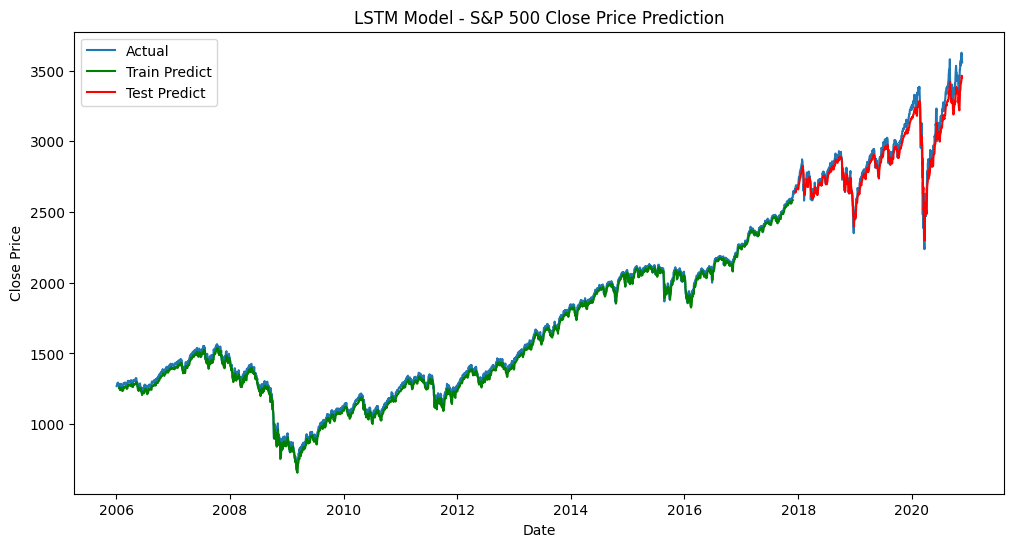

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Prepare the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices.values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Create the dataset with look_back
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=20, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Evaluate the model
test_score = np.sqrt(mean_squared_error(Y_test[0], test_predict[:, 0]))
print(f'LSTM Model Test Score: {test_score} RMSE')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(close_prices.index, close_prices, label='Actual')
plt.plot(close_prices.index[look_back:len(train_predict) + look_back], train_predict, label='Train Predict', color='green')
plt.plot(close_prices.index[len(train_predict)+(look_back*2)+1:len(close_prices)-1], test_predict, label='Test Predict', color='red')
plt.title('LSTM Model - S&P 500 Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
